In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

In [4]:
file_path = './resources/완_박스오피스_일별_2003-2022_ver2.csv'
mv_2003 = pd.read_csv(file_path)
print(mv_2003.columns)
mv_2003

Index(['순위', '영화명', '개봉일', '등급', '장르', '대표국적', '국적', '제작사', '배급사', '감독', '배우 ',
       '기준일', '매출액', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수'],
      dtype='object')


,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
2,2,위대한 유산,2003-10-24,15세관람가,코미디,한국,한국,CJ ENM,CJ ENM,오상훈,"김선아,임창정,최무인,송은정,홍금봉,신성아,김대중,오유진,유순철,신이,모지은,김기천...",2003-11-11,1658000,1658000,177,177,1,3
3,3,황산벌,2003-10-17,15세관람가,코미디,한국,한국,(주)씨네월드,(주)씨네월드,이준익,"박중훈,정진영,오지명,김병철,김선아,김윤태,이문식,조대은,김만수,김현두,나수원,조철...",2003-11-11,1257000,1257000,116,116,1,3
4,4,아이덴티티,2003-10-31,15세관람가,"범죄,스릴러",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,제임스 맨골드,"존 쿠삭,레이 리오타",2003-11-11,821000,821000,102,102,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482747,34,애프터 양,2022-06-01,전체관람가,"드라마,SF",미국,미국,NaN,"(주)영화특별시에스엠씨,주식회사 왓챠",코고나다,콜린 파렐,2022-12-31,629910,389758300,90,40233,1,1
482748,31,더 메뉴,2022-12-07,15세이상관람가,스릴러,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,마크 미로드,"랄프 파인즈,안야 테일러 조이,니콜라스 홀트,자넷 맥티어,주디스 라이트,존 레귀자모",2022-12-31,1047000,320680200,107,31360,3,3
482749,28,양자경의 더 모든 날 모든 순간,2022-11-23,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,2703789,291016371,276,27325,7,8
482750,26,캐리와 슈퍼콜라,2023-01-18,전체관람가,애니메이션,한국,한국,(주)캐리소프트,롯데컬처웍스(주)롯데엔터테인먼트,"오성윤,이춘백","최정윤,엄상현,이다은,원옥화,정주원,이창민,한상태,김지정,강나후,김신비,소경호",2022-12-31,3993000,3993000,295,295,1,1


### 천만영화 관객순으로 정렬하고  액션배우 추출

In [18]:
def get_grouped_movies(movies):
    movies = movies.rename(columns={'배우 ':'배우'})
    movies['기준일'] = pd.to_datetime(movies['기준일'],format='%Y-%m-%d')
    movies['개봉일'] = pd.to_datetime(movies['개봉일'],format='%Y-%m-%d')
    movies_v1 = movies.sort_values(by=['기준일','순위'])
    movies_v2 = movies_v1.loc[movies_v1.groupby(['영화명','개봉일'])['기준일'].idxmax()]
    return movies_v2   

In [7]:
def get_10million_movies(movies):
    movies = movies.rename(columns={'배우 ':'배우'})
    movies['기준일'] = pd.to_datetime(movies['기준일'],format='%Y-%m-%d')
    movies['개봉일'] = pd.to_datetime(movies['개봉일'],format='%Y-%m-%d')
    movies_v1 = movies.sort_values(by=['기준일','순위'])
    movies_v2 = movies_v1.loc[movies_v1.groupby(['영화명','개봉일'])['기준일'].idxmax()]
    mv_2003_10million = movies_v2[movies_v2['누적관객수'] > 10**7] # 10**6 은 백만, 10**7은 천만
    mv_2003_10million_sort = mv_2003_10million.sort_values('누적관객수', ascending = False)
    return mv_2003_10million_sort

In [8]:
mv_hit = get_10million_movies(mv_2003)
mv_hit

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2
395194,108,극한직업,2019-01-23,15세이상관람가,코미디,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2020-06-09,6000,139655543516,1,16266338,1,1
418675,64,신과함께-죄와 벌,2017-12-20,12세이상관람가,"판타지,드라마",한국,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,김용화,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",2021-01-26,45000,115727528087,9,14414658,5,5
482061,33,국제시장,2014-12-17,12세이상관람가,드라마,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지...",2022-12-23,576000,110947621230,96,14264478,2,2
391617,8,어벤져스: 엔드게임,2019-04-24,12세이상관람가,"액션,SF",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2020-05-05,47233940,122492181020,6668,13977602,439,587
386725,35,겨울왕국 2,2019-11-21,전체관람가,애니메이션,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2020-03-21,1575000,114810421450,177,13747792,1,1
372424,61,베테랑,2015-08-05,15세이상관람가,"액션,드라마",한국,한국,"(주)외유내강,(주)필름케이",(주)씨제이이엔엠,류승완,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영...",2019-10-23,324000,105170856250,61,13414484,9,10
329329,17,아바타,2009-12-17,12세이상관람가,"SF,액션,어드벤처",미국,미국,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",제임스 카메론,"샘 워싱턴,조 샐다나,시고니 위버",2018-07-03,8099000,125304346000,776,13338863,27,79
424892,95,도둑들,2012-07-25,15세이상관람가,"액션,범죄",한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동...",2021-03-29,10000,93672497700,2,12984701,1,1
393794,73,7번방의 선물,2013-01-23,15세이상관람가,"코미디,드라마",한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동...",2020-05-27,52000,91437368170,10,12812144,5,5


In [13]:
def get_actor_list(movies, genre):
    movies_genre = movies[movies['장르'].str.contains(genre,na=False)]
    df_actors_v2 = movies_genre[:]
    df_actors_v2['배우List'] = df_actors_v2['배우'].apply(lambda x : str(x).split(','))
    df_actors_explode_v2 = df_actors_v2.explode(column=['배우List'],ignore_index=True)
    df_group_actor_movie = df_actors_explode_v2.groupby('배우List')['영화명'].apply(list).reset_index(name='영화목록')
    df_group_actor_movie['영화촬영개수'] = df_group_actor_movie['영화목록'].apply(lambda x : len(x))
    df_gp_actor = df_group_actor_movie.sort_values('영화촬영개수', ascending = False)
    return df_gp_actor

In [15]:
mv_stars_action = get_actor_list(mv_hit,'액션')
mv_stars_action

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4964\3215934319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actors_v2['배우List'] = df_actors_v2['배우'].apply(lambda x : str(x).split(','))


,배우List,영화목록,영화촬영개수
35,김서원,"[베테랑, 암살, 범죄도시2]",3
270,제레미 레너,"[어벤져스: 엔드게임, 어벤져스: 인피니티 워, 어벤져스: 에이지 오브 울트론]",3
299,최덕문,"[명량, 도둑들, 암살]",3
313,크리스 헴스워스,"[어벤져스: 엔드게임, 어벤져스: 인피니티 워, 어벤져스: 에이지 오브 울트론]",3
91,돈 치들,"[어벤져스: 엔드게임, 어벤져스: 인피니티 워, 어벤져스: 에이지 오브 울트론]",3
...,...,...,...
116,박주환,[범죄도시2],1
115,박종관,[부산행],1
114,박정환,[암살],1
113,박재홍,[해운대],1


In [16]:
mv_stars_adventure = get_actor_list(mv_hit,'어드벤처')
mv_stars_adventure

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4964\3215934319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actors_v2['배우List'] = df_actors_v2['배우'].apply(lambda x : str(x).split(','))


,배우List,영화목록,영화촬영개수
39,엘리자베스 올슨,"[어벤져스: 인피니티 워, 어벤져스: 에이지 오브 울트론]",2
65,크리스 헴스워스,"[어벤져스: 인피니티 워, 어벤져스: 에이지 오브 울트론]",2
26,사무엘 L. 잭슨,"[어벤져스: 인피니티 워, 어벤져스: 에이지 오브 울트론]",2
50,제레미 레너,"[어벤져스: 인피니티 워, 어벤져스: 에이지 오브 울트론]",2
15,마크 러팔로,"[어벤져스: 인피니티 워, 어벤져스: 에이지 오브 울트론]",2
...,...,...,...
32,수현,[어벤져스: 에이지 오브 울트론],1
34,시고니 위버,[아바타],1
35,신정원,[해운대],1
36,안소니 마키,[어벤져스: 인피니티 워],1


In [ ]:
df_action[:20].plot.bar(x='배우List', y='영화촬영개수', rot=80, figsize=(10, 5), fontsize=10)
plt.title('한국 천만영화와 배우(장르 : 액션)')
plt.xlabel('배우')
plt.ylabel('한국 첫만영화 소지 개수')
# plt.grid(True)
plt.show()

# 히트맵 그리기

In [20]:
movies_all = get_grouped_movies(mv_2003)
movies_all

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
409054,29,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,"유아인,박신혜,전배수,고나영,권용채,김경태,김다영,김단비,김라희,김미래,김미래,김윤...",2020-10-28,2890000,15968219900,289,1903992,2,2
420077,57,#아이엠히어,2021-01-14,12세이상관람가,"멜로/로맨스,코미디",프랑스,프랑스,NaN,(주)넥스트엔터테인먼트월드(NEW),에릭 라티고,"알랭 샤바,배두나,이명자,선종남,김자금,강현중,정윤하,송경의,엄지만,남승화,이지민,...",2021-02-09,82000,136875710,11,16404,6,6
478854,51,#위왓치유,2021-06-03,청소년관람불가,다큐멘터리,기타,기타,NaN,찬란,"바르보라 차르포바,비트 클루삭",NaN,2022-11-22,288000,16759950,48,1908,1,1
284094,108,...ing,2003-11-28,12세관람가,"드라마,멜로/로맨스",한국,한국,드림맥스(주),(주)튜브엔터테인먼트,이언희,"임수정,김래원,이미숙,김지영,김현수,박혜연,장미,이성경,박소연,김순애,최덕문,김인문...",2017-03-19,5000,217487000,1,34308,1,1
362083,84,0.0MHz,2019-05-29,15세이상관람가,공포(호러),한국,한국,(주)제이엠컬쳐스,(주)스마일이엔티,유선동,"정은지,이성열,최윤영,신주환,정원창,박명신,남관효,박대희,노혜영,서진석,김대현,신승...",2019-06-28,84000,1088258860,12,137294,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427292,90,"힘내세요, 병헌씨",2013-06-27,15세이상관람가,"코미디,드라마",한국,한국,NaN,㈜인디스토리,이병헌,"홍완표,양현민,김영현,허준석,이재광,이창한,정현정,조휘상,강호규,강호규,김수완,황인...",2021-04-21,7000,28862600,1,3980,1,1
379736,15,"힘을 내요, 미스터 리",2019-09-11,12세이상관람가,"코미디,드라마",한국,한국,"(주)용필름,(주)덱스터스튜디오",(주)넥스트엔터테인먼트월드(NEW),이계벽,"차승원,엄채영,박해준,김혜옥,안길강,전혜빈,류한비,조한철,성지루,김법래,정원중,신현...",2019-12-28,10950000,9930518906,1095,1181960,5,5
238564,99,힙스터: 안개의 덫,2015-10-21,청소년관람불가,"멜로/로맨스,드라마",한국,한국,(주)마부엔터테인먼트,고구마콘텐츠허브(주),강명진,"유사라,김동윤,정종우,류아진,박민규,강인화",2015-10-21,5000,5000,1,1,1,1
43736,59,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,"숀 빈,소피아 부시,자크리 나이튼,닐 맥도노프",2007-08-13,7000,153080000,1,23025,1,1


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4964\2021129279.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_train.corr()


             순위       매출액     누적매출액       관객수     누적관객수      스크린수      상영횟수
순위     1.000000 -0.033326 -0.071538 -0.041811 -0.074519 -0.105274 -0.063612
매출액   -0.033326  1.000000  0.108049  0.997025  0.070821  0.857406  0.962515
누적매출액 -0.071538  0.108049  1.000000  0.107888  0.991884  0.128484  0.118487
관객수   -0.041811  0.997025  0.107888  1.000000  0.071253  0.874914  0.973886
누적관객수 -0.074519  0.070821  0.991884  0.071253  1.000000  0.093369  0.082130
스크린수  -0.105274  0.857406  0.128484  0.874914  0.093369  1.000000  0.953452
상영횟수  -0.063612  0.962515  0.118487  0.973886  0.082130  0.953452  1.000000


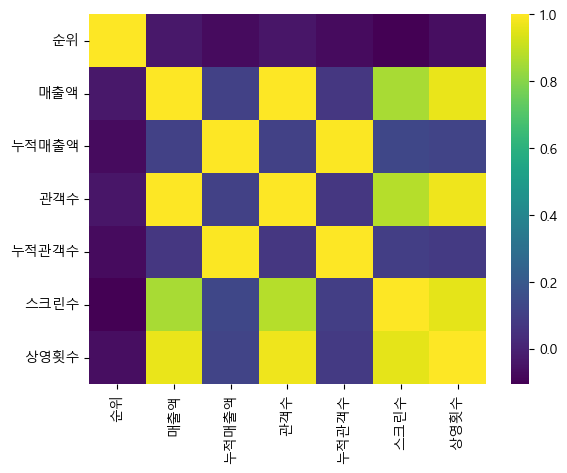

In [21]:


##########데이터 로드

df_train = movies_all[:]

##########데이터 분석

df_corr = df_train.corr()
print(df_corr)
'''
               hours  attendance  exam_score
hours       1.000000    0.755555    0.926371
attendance  0.755555    1.000000    0.856456
exam_score  0.926371    0.856456    1.000000
'''

sns.heatmap(df_corr, cmap='viridis')
plt.show()

ValueError: could not convert string to float: '#살아있다'

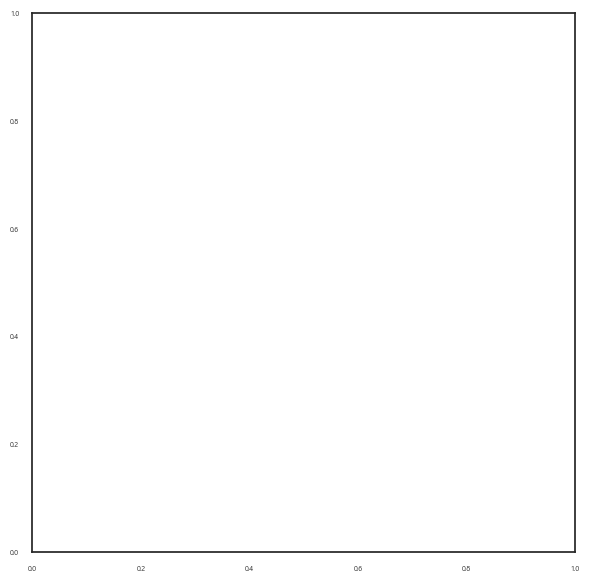

In [24]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)

sns.set(style='white', font_scale=1.6,
        #font="AppleGothic", 
        font='Malgun Gothic',
        rc={"axes.unicode_minus":False})

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_train, bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_train, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .3},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws={"size": 4},
            fmt=".2f"
           )
# .figure.savefig('./resources/testout.pdf')